<a href="https://colab.research.google.com/github/AnvayM/Data-Science/blob/Titanic/Titanic_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import os
from google.colab import drive
drive.mount("/content/mount")

Mounted at /content/mount


##**In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).**

In [ ]:
#data1="C:/Users/acer/Desktop/Data Science/Kegal/Titanic Data Set/train1.csv",
path="/content/mount/MyDrive/Colab Notebooks/Titanic Data Set (1)/train.csv"
path2="/content/mount/MyDrive/Colab Notebooks/Titanic Data Set (1)/test.csv"
titanic_train=pd.read_csv(path)
titanic_test=pd.read_csv(path2)
print(titanic_train)
print(titanic_test)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]
     PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            89

In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_train.isnull

<bound method DataFrame.isnull of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

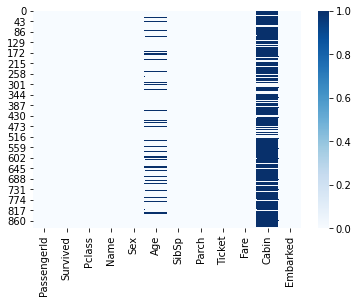

In [ ]:
sns.heatmap(titanic_train.isnull(),cmap="Blues",xticklabels=True)

In [ ]:
titanic_train.fillna({"Age":29.669},inplace=True)

In [ ]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.669,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.0000,C148,C


In [ ]:
embarked=pd.get_dummies(titanic_train["Embarked"],drop_first=True).head(900)
embarked.head(900)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
embarked.head(900)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
Male=pd.get_dummies(titanic_train["Sex"],drop_first=True).head(900)
Male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
Male.head(900)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
titanic_train=titanic_train.drop(["Name","Sex","Ticket","Embarked"],axis=1)
titanic_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.000,1,0,7.2500,NaN
1,2,1,1,38.000,1,0,71.2833,C85
2,3,1,3,26.000,0,0,7.9250,NaN
3,4,1,1,35.000,1,0,53.1000,C123
4,5,0,3,35.000,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000,0,0,13.0000,NaN
887,888,1,1,19.000,0,0,30.0000,B42
888,889,0,3,29.669,1,2,23.4500,NaN
889,890,1,1,26.000,0,0,30.0000,C148


In [ ]:
titanic_train=titanic_train.drop("Cabin",axis=1)
titanic_train


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000,1,0,7.2500
1,2,1,1,38.000,1,0,71.2833
2,3,1,3,26.000,0,0,7.9250
3,4,1,1,35.000,1,0,53.1000
4,5,0,3,35.000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000,0,0,13.0000
887,888,1,1,19.000,0,0,30.0000
888,889,0,3,29.669,1,2,23.4500
889,890,1,1,26.000,0,0,30.0000


In [ ]:
titanic_train=pd.concat([titanic_train,embarked,Male],axis=1)
titanic_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.000,1,0,7.2500,0,1,1
1,2,1,1,38.000,1,0,71.2833,0,0,0
2,3,1,3,26.000,0,0,7.9250,0,1,0
3,4,1,1,35.000,1,0,53.1000,0,1,0
4,5,0,3,35.000,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000,0,0,13.0000,0,1,1
887,888,1,1,19.000,0,0,30.0000,0,1,0
888,889,0,3,29.669,1,2,23.4500,0,1,0
889,890,1,1,26.000,0,0,30.0000,0,0,1


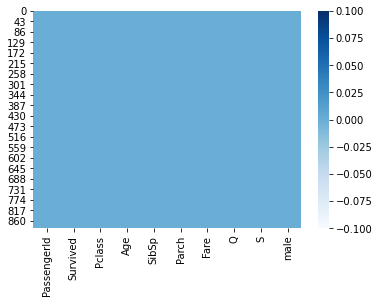

In [ ]:
sns.heatmap(titanic_train.isnull(),cmap="Blues",xticklabels=True)


In [ ]:
titanic_train.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.25,0,1,1


In [ ]:
titanic_train=titanic_train[["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]]
titanic_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000,1,0,7.2500
1,2,1,1,38.000,1,0,71.2833
2,3,1,3,26.000,0,0,7.9250
3,4,1,1,35.000,1,0,53.1000
4,5,0,3,35.000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000,0,0,13.0000
887,888,1,1,19.000,0,0,30.0000
888,889,0,3,29.669,1,2,23.4500
889,890,1,1,26.000,0,0,30.0000


In [ ]:
X=titanic_train.drop("Survived",axis=1)
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.000,1,0,7.2500
1,2,1,38.000,1,0,71.2833
2,3,3,26.000,0,0,7.9250
3,4,1,35.000,1,0,53.1000
4,5,3,35.000,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.000,0,0,13.0000
887,888,1,19.000,0,0,30.0000
888,889,3,29.669,1,2,23.4500
889,890,1,26.000,0,0,30.0000


In [ ]:
y=titanic_train["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
print("Val of X_train",X_train.shape)
print("Val of y_train",y_train.shape)
print("Val of X_test",X_test.shape)
print("Val of y_test",y_test.shape)

Val of X_train (623, 6)
Val of y_train (623,)
Val of X_test (268, 6)
Val of y_test (268,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest=RandomForestClassifier(30,"gini")
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
forest.score(X_test,y_test)

0.7014925373134329